In [1]:
import kagglehub
import pandas as pd
import os

# Download dataset langsung ke path sementara
path = kagglehub.dataset_download("caesarmario/bank-negara-indonesia-stock-historical-price")

# Cek path dataset
print("Path to dataset files:", path)

# Daftar semua file di dalam folder dataset
files = os.listdir(path)
print("Files in dataset:", files)

# Cari file CSV di dalam folder
csv_files = [f for f in files if f.endswith('.csv')]

if csv_files:
    # Ambil file pertama yang memiliki format CSV
    csv_path = os.path.join(path, csv_files[0])
    
    # Baca file CSV
    df = pd.read_csv(csv_path)
    print(df.head())  # Menampilkan 5 baris pertama
else:
    print("No CSV files found in the dataset.")

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\caesarmario\bank-negara-indonesia-stock-historical-price\versions\363
Files in dataset: ['BBNI.JK.csv', 'BBNI.JK_monthly.csv', 'BBNI.JK_weekly.csv']
         Date    Open    High     Low   Close    Adj Close    Volume
0  2019-01-01  4400.0  4400.0  4400.0  4400.0  3718.353516         0
1  2019-01-02  4400.0  4400.0  4337.5  4362.5  3686.663574  15681200
2  2019-01-03  4337.5  4387.5  4325.0  4362.5  3686.663574  21416600
3  2019-01-04  4362.5  4400.0  4337.5  4362.5  3686.663574  41078600
4  2019-01-07  4412.5  4462.5  4412.5  4437.5  3750.043945  48108200


In [2]:
print(df.info())  # Menampilkan tipe data dan jumlah non-null
print(df.describe())  # Statistik ringkasan untuk kolom numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1469 non-null   object 
 1   Open       1469 non-null   float64
 2   High       1469 non-null   float64
 3   Low        1469 non-null   float64
 4   Close      1469 non-null   float64
 5   Adj Close  1469 non-null   float64
 6   Volume     1469 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.5+ KB
None
              Open        High          Low        Close    Adj Close   
count  1469.000000  1469.00000  1469.000000  1469.000000  1469.000000  \
mean   3994.853642  4040.25017  3942.828455  3990.103812  3669.727141   
std    1010.565605  1014.55639  1005.874709  1010.386491  1044.690315   
min    1580.000000  1705.00000  1485.000000  1580.000000  1408.581299   
25%    3225.000000  3250.00000  3150.000000  3212.500000  2863.967041   
50%    4225.000000  4262.500

In [3]:
print(df.isnull().sum())  # Cek jumlah data yang hilang di tiap kolom

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


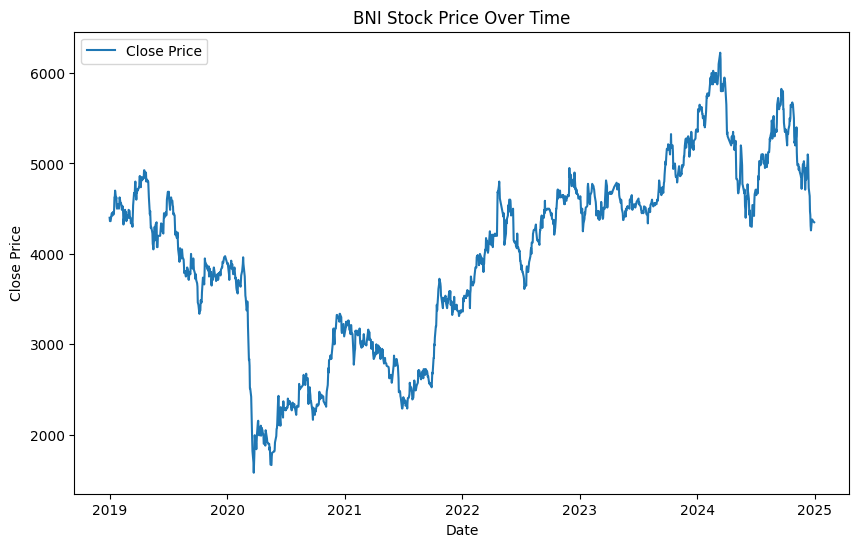

In [4]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  # Pastikan kolom tanggal dalam format datetime
df.set_index('Date', inplace=True)  # Jadikan kolom tanggal sebagai index

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('BNI Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [5]:
df.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

In [6]:
df_monthly = df['Close'].resample('M').mean()
print(df_monthly)

Date
2019-01-31    4499.456522
2019-02-28    4460.625000
2019-03-31    4541.071429
2019-04-30    4828.977273
2019-05-31    4293.478261
                 ...     
2024-08-31    5244.772727
2024-09-30    5600.000000
2024-10-31    5436.956522
2024-11-30    4992.250000
2024-12-31    4657.105263
Freq: M, Name: Close, Length: 72, dtype: float64


In [7]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()

In [8]:
print(df.describe())

              Open        High          Low        Close    Adj Close   
count  1469.000000  1469.00000  1469.000000  1469.000000  1469.000000  \
mean   3994.853642  4040.25017  3942.828455  3990.103812  3669.727141   
std    1010.565605  1014.55639  1005.874709  1010.386491  1044.690315   
min    1580.000000  1705.00000  1485.000000  1580.000000  1408.581299   
25%    3225.000000  3250.00000  3150.000000  3212.500000  2863.967041   
50%    4225.000000  4262.50000  4175.000000  4212.500000  3739.480713   
75%    4675.000000  4725.00000  4630.000000  4675.000000  4354.409180   
max    6225.000000  6250.00000  6100.000000  6225.000000  5950.000000   

             Volume       SMA_30  
count  1.469000e+03  1440.000000  
mean   6.561081e+07  3978.617014  
std    4.946398e+07  1000.552763  
min    0.000000e+00  1908.000000  
25%    3.582210e+07  3127.500000  
50%    5.113240e+07  4247.291667  
75%    7.955300e+07  4638.833333  
max    4.440854e+08  5943.333333  


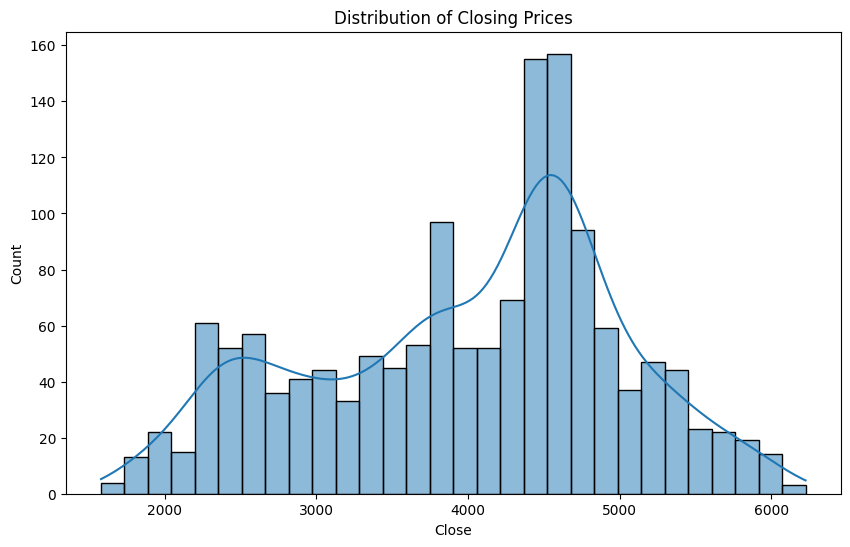

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

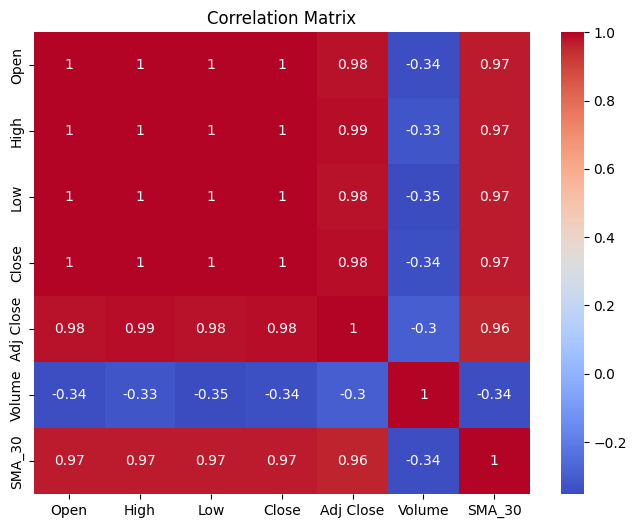

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

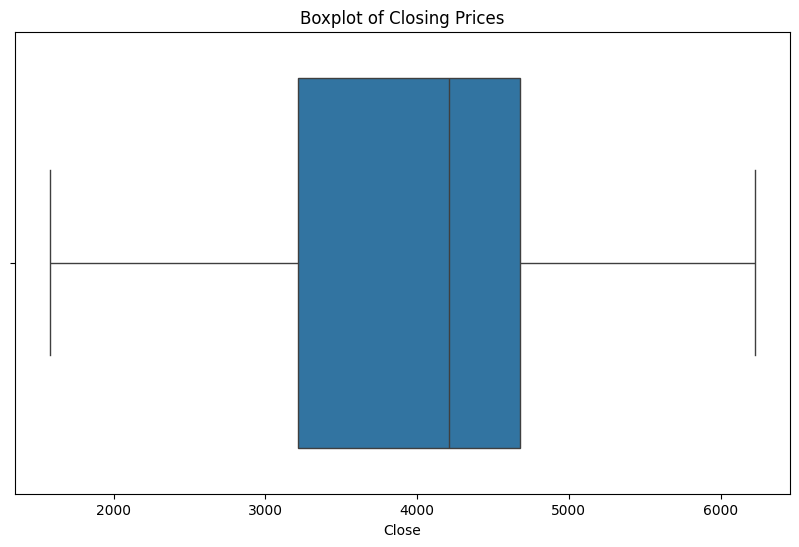

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Closing Prices')
plt.show()

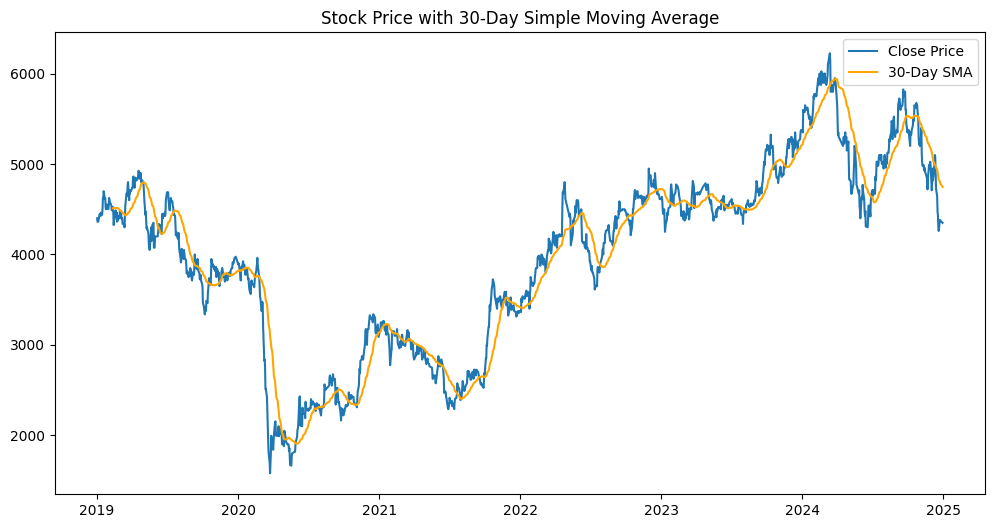

In [13]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_30'], label='30-Day SMA', color='orange')
plt.title('Stock Price with 30-Day Simple Moving Average')
plt.legend()
plt.show()

In [14]:
print(df.isnull().sum())  # Cek missing values

df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill (opsional)

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SMA_30       29
dtype: int64


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [27]:
# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 10, 20, 500, 1000],
    'max_depth': [1, 4, 10, None, 20, 30, 3, 5],
    'min_samples_split': [1, 2, 5, 10],
    'random_state': [0, 1, 42, 379, 2023],
    'criterion': ['squared_error'],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'ccp_alpha': [0.0, 0.01]
}

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create a classifier: random forest
clf = RandomForestRegressor(param_grid)

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

# # Set up GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Implement GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 80640 candidates, totalling 403200 fits


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
176400 fits failed out of a total of 403200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_p

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators={'bootstrap': [True,
                                                                         False],
                                                           'ccp_alpha': [0.0,
                                                                         0.01],
                                                           'criterion': ['squared_error'],
                                                           'max_depth': [1, 4,
                                                                         10,
                                                                         None,
                                                                         20, 30,
                                                                         3, 5],
                                                           'max_features': ['auto',
                                                                            'sqrt',
                                                                            'log2'],
                                                           'min_samples_leaf': [1,
                                                                                2,
                                                                                4],
                                                           'min_samples_split': [1,
                                                                                 2,
                                                                                 5,
                                                                                 10],
                                                           'n_estimators': [50,
                                                                            100,
                                                                            150,
                                                                            10,
                                                                            20,
                                                                            500,
                                                                            1000],
                                                           'oob_score': [True,
                                                                         False],
                                                           'random_...
                                                                            2023]}),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0.0, 0.01],
                         'criterion': ['squared_error'],
                         'max_depth': [1, 4, 10, None, 20, 30, 3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 150, 10, 20, 500, 1000],
                         'oob_score': [True, False],
                         'random_state': [0, 1, 42, 379, 2023]},
             verbose=2)

In [30]:
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'oob_score': True, 'random_state': 1}
Best score: 0.9315067396032963


In [31]:
# Use the best estimator to make predictions on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [35]:
from sklearn import metrics

print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R2):", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.045984308408038625
Mean Squared Error (MSE): 0.0048587715379027245
Root Mean Squared Error (RMSE): 0.06970488890962186
R-squared (R2): 0.4207368512185675
